# Wine Quality

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("taweilo/wine-quality-dataset-balanced-classification")

print("Path to dataset files:", path)

100%|██████████| 377k/377k [00:00<00:00, 585kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/taweilo/wine-quality-dataset-balanced-classification/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(path + '/wine_data.csv')

In [ ]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         21000 non-null  float64
 1   volatile_acidity      21000 non-null  float64
 2   citric_acid           21000 non-null  float64
 3   residual_sugar        21000 non-null  float64
 4   chlorides             21000 non-null  float64
 5   free_sulfur_dioxide   21000 non-null  float64
 6   total_sulfur_dioxide  21000 non-null  float64
 7   density               21000 non-null  float64
 8   pH                    21000 non-null  float64
 9   sulphates             21000 non-null  float64
 10  alcohol               21000 non-null  float64
 11  quality               21000 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.9 MB


In [ ]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,9.797079,0.774796,0.793870,31.289348,0.200245,129.442333,229.008762,1.009972,3.158712,1.020641,11.291716,6.000000
std,2.413919,0.365015,0.384833,19.015391,0.124933,77.167262,100.183265,0.012032,0.171371,0.408304,1.182198,2.000048
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.600000,0.430000,0.410000,9.800000,0.072000,45.000000,150.000000,0.997417,3.030000,0.620000,10.400000,4.000000
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.500000,1.012200,3.150000,1.080000,11.300000,6.000000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.325000,311.625000,1.019840,3.270000,1.360000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
df.corr()['quality'].sort_values(ascending=False)

,quality
quality,1.000000
alcohol,0.081891
free_sulfur_dioxide,0.053021
chlorides,0.052905
citric_acid,0.052341
residual_sugar,0.049734
sulphates,0.047728
density,0.038473
fixed_acidity,0.037545
total_sulfur_dioxide,0.035975


<Axes: >

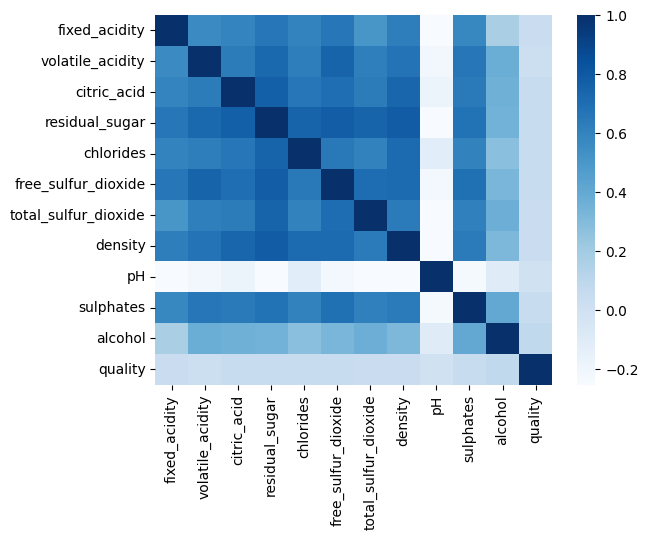

In [ ]:
sns.heatmap(df.corr(), cmap='Blues', cbar=True)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['quality'])
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, X.shape

((16800, 11), (4200, 11), (21000, 11))

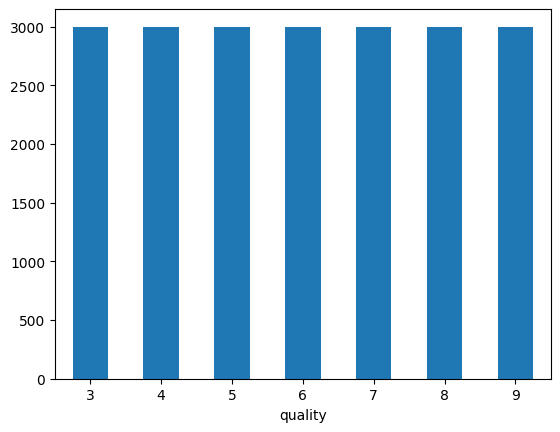

In [ ]:
y.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='quality', ylabel='count'>

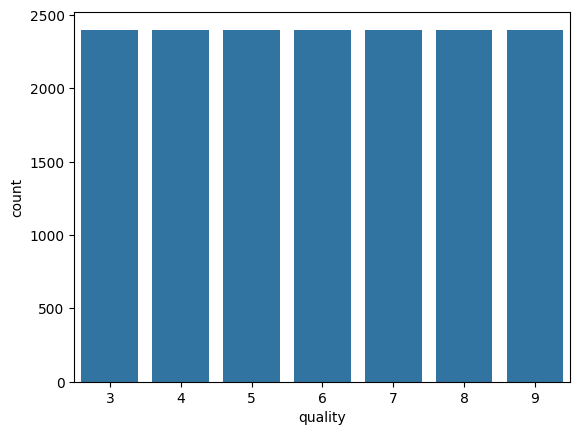

In [ ]:
sns.barplot(y_train.value_counts())

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipe = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

X_train_prepared = pd.DataFrame(num_pipe.fit_transform(X_train), columns=X_train.columns)
X_test_prepared = pd.DataFrame(num_pipe.transform(X_test), columns=X_test.columns)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train_prepared, y_train)
print(logreg.score(X_test_prepared, y_test))
print(logreg.score(X_train_prepared, y_train))

0.3047619047619048
0.30339285714285713


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train_prepared, y_train)
print(rf_clf.score(X_test_prepared, y_test))
print(rf_clf.score(X_train_prepared, y_train))

0.6195238095238095
1.0


**Polynomial** **Features**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pipe_with_poly = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='median')),
        ('poly', PolynomialFeatures()),
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier())
    ]
)

pipe_with_poly.get_params()

{'memory': None,
 'steps': [('imputer', SimpleImputer(strategy='median')),
  ('poly', PolynomialFeatures()),
  ('scaler', StandardScaler()),
  ('rf', RandomForestClassifier())],
 'transform_input': None,
 'verbose': False,
 'imputer': SimpleImputer(strategy='median'),
 'poly': PolynomialFeatures(),
 'scaler': StandardScaler(),
 'rf': RandomForestClassifier(),
 'imputer__add_indicator': False,
 'imputer__copy': True,
 'imputer__fill_value': None,
 'imputer__keep_empty_features': False,
 'imputer__missing_values': nan,
 'imputer__strategy': 'median',
 'poly__degree': 2,
 'poly__include_bias': True,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'sqrt',
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_samples_le

In [ ]:
np.arange(2,10)

array([2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'poly__degree': np.arange(2, 5),
          'poly__include_bias': [False]}

gscv = GridSearchCV(estimator=pipe_with_poly, param_grid=params, n_jobs=-1, cv=5)

gscv.fit(X_train_prepared, y_train)
print(gscv.score(X_test_prepared, y_test))
print(gscv.score(X_train_prepared, y_train))

0.6207142857142857
1.0


In [ ]:
gscv.best_params_

{'poly__degree': 2, 'poly__include_bias': False}

In [ ]:
gscv.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('imputer', SimpleImputer(strategy='median')),
  ('poly', PolynomialFeatures()),
  ('scaler', StandardScaler()),
  ('rf', RandomForestClassifier())],
 'estimator__transform_input': None,
 'estimator__verbose': False,
 'estimator__imputer': SimpleImputer(strategy='median'),
 'estimator__poly': PolynomialFeatures(),
 'estimator__scaler': StandardScaler(),
 'estimator__rf': RandomForestClassifier(),
 'estimator__imputer__add_indicator': False,
 'estimator__imputer__copy': True,
 'estimator__imputer__fill_value': None,
 'estimator__imputer__keep_empty_features': False,
 'estimator__imputer__missing_values': nan,
 'estimator__imputer__strategy': 'median',
 'estimator__poly__degree': 2,
 'estimator__poly__include_bias': True,
 'estimator__poly__interaction_only': False,
 'estimator__poly__order': 'C',
 'estimator__scaler__copy': True,
 'estimator__scaler__with_mean': True,
 'estimator__scaler__with_std': True,
 

In [ ]:
pd.DataFrame(gscv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly__degree,param_poly__include_bias,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,34.716414,5.012399,0.135434,0.002300,2,False,"{'poly__degree': 2, 'poly__include_bias': False}",0.575595,0.570833,0.587202,0.589286,0.577083,0.580000,0.007072,1
1,82.360230,0.775091,0.208464,0.063096,3,False,"{'poly__degree': 3, 'poly__include_bias': False}",0.571429,0.572917,0.588095,0.580357,0.577679,0.578095,0.005942,2
2,154.975282,15.355829,0.360651,0.098327,4,False,"{'poly__degree': 4, 'poly__include_bias': False}",0.574107,0.570833,0.586905,0.577083,0.576488,0.577083,0.005380,3


In [ ]:
from sklearn.pipeline import make_pipeline

pipeline_ = make_pipeline(
      SimpleImputer(strategy='median'),
      PolynomialFeatures(degree=3, include_bias=False),
      StandardScaler()
  )

X_prepared_poly = pd.DataFrame(pipeline_.fit_transform(X), columns=pipeline_.get_feature_names_out())
X_train_prepared_poly = pd.DataFrame(pipeline_.fit_transform(X_train), columns=pipeline_.get_feature_names_out())
X_test_prepared_poly = pd.DataFrame(pipeline_.transform(X_test), columns=pipeline_.get_feature_names_out())


X_train_prepared_poly.shape, X_test_prepared_poly.shape

((16800, 363), (4200, 363))

In [ ]:
softmax_reg_poly = LogisticRegression(random_state=42, max_iter=10_000)

softmax_reg_poly.fit(X_train_prepared_poly, y_train)
softmax_reg_poly.score(X_test_prepared_poly, y_test)

0.3330952380952381

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict

cross_val_predictions = cross_val_predict(softmax_reg_poly, X_prepared_poly, y, cv=5)
score = cross_val_score(softmax_reg_poly, X_prepared_poly, y, cv=5, scoring='accuracy')
print(score)
print(score.mean())

[0.27714286 0.32857143 0.33142857 0.28928571 0.22047619]
0.2893809523809524


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y, cross_val_predictions))

              precision    recall  f1-score   support

           3       0.23      0.30      0.26      3000
           4       0.22      0.19      0.20      3000
           5       0.51      0.46      0.48      3000
           6       0.45      0.50      0.47      3000
           7       0.09      0.03      0.05      3000
           8       0.23      0.22      0.23      3000
           9       0.22      0.33      0.26      3000

    accuracy                           0.29     21000
   macro avg       0.28      0.29      0.28     21000
weighted avg       0.28      0.29      0.28     21000



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

full_pipeline = Pipeline(
    [
        ('poly', PolynomialFeatures(include_bias=False)),
        ('scaler', StandardScaler()),
        ('softmax', LogisticRegression(max_iter=1_000, random_state=42))
    ]
)

# full_pipeline.get_params()

param_distribs = {
    'poly__degree': [2, 3, 4],
    'softmax__C': [1, 10, 100, 150]
}

rnd_search = RandomizedSearchCV(full_pipeline, param_distributions=param_distribs, n_iter=20, cv=5, scoring='accuracy')

rnd_search.fit(X_train, y_train)
rnd_search.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown

KeyboardInterrupt: 

In [ ]:
rnd_search.best_params_

In [ ]:
from sklearn.svm import SVC

svc_clf = SVC(kernel='linear')
svc_clf.fit(X_train_prepared, y_train)
svc_clf.score(X_test_prepared, y_test)

In [ ]:
from sklearn.svm import LinearSVC

linear_svm_pipeline = Pipeline(
    [
        ('poly', PolynomialFeatures(include_bias=False)),
        ('scaler', StandardScaler()),
        ('linear_svm_clf', LinearSVC(max_iter=10_000, dual=True))
    ]
)

params = {
    'poly__degree': [2, 3, 4],
    'linear_svm_clf__C': [0.01, 0.1, 1, 10, 100]
}

gscv = GridSearchCV(estimator=linear_svm_pipeline, param_grid=params, cv=3, scoring='accuracy')

gscv.fit(X, y)
gscv.best_params_

In [ ]:
pd.DataFrame(gscv.cv_results_)

In [ ]:
poly_kernel_svm_clf = SVC(kernel='poly', degree=3, coef0=1, C=5)
poly_kernel_svm_clf.fit(X_train_prepared, y_train)
print(f'Score of Support Vector classifier with polynomial kernel and 3rd degree, C=5 and coef0=1: {poly_kernel_svm_clf.score(X_test_prepared, y_test)}')



In [ ]:
just_a_pipeline = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('just_a_svc': SVC())
    ]
)

params = [
    {
        'just_a_svc__kernel': ['poly'],
        'just_a_svc__degree': [2, 3, 4],
        'just_a_svc__C': [0.01, 0.1, 1, 10, 100]
    },
    {
        'just_a_svc__kernel': ['rbf'],
        'just_a_svc__gamma': [0.01, 0.1, 1, 10, 100],
        'just_a_svc__C': [0.01, 0.1, 1, 10, 100]
    }
]

exhaustive_grid_search = GridSearchCV(estimator=just_a_pipeline, param_grid=params, cv=5, scoring='accuracy')
exhaustive_grid_search.fit(X, y)
exhaustive_grid_search.score(X_test, y_test)

In [ ]:
exhaustive_grid_search.best_params_

In [ ]:
pd.DataFrame(exhaustive_grid_search.cv_results_)